In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* from the above distribution all means are really close to each other
* looking at the STD the data seems to wide spread
* looking at the mean the data seems to be right skewed
* the stds are close - between 14.60 to 15.19
* someone has a minimum score of 0 in math, the minimum score for writing is 10 and the minimum score of reading is 17
* max score is 100

## Exploring the data

In [12]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
## lets seperate categorical and numerical features

columns = df.columns
cat_features, num_features =[],[]
for col in columns:
    if df[col].dtype == 'O':
        cat_features.append(col)
    else:
        num_features.append(col)
        
print(f"Categorical features: {cat_features}")
print(f"Numerical featues: {num_features}")

Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical featues: ['math score', 'reading score', 'writing score']


In [15]:
df[cat_features].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [17]:
## Creating new features

df['Total_score'] = df["math score"] +df["reading score"] + df["writing score"]
df["Average_score"] = df["Total_score"]/len(num_features)

In [18]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


4) Visualization

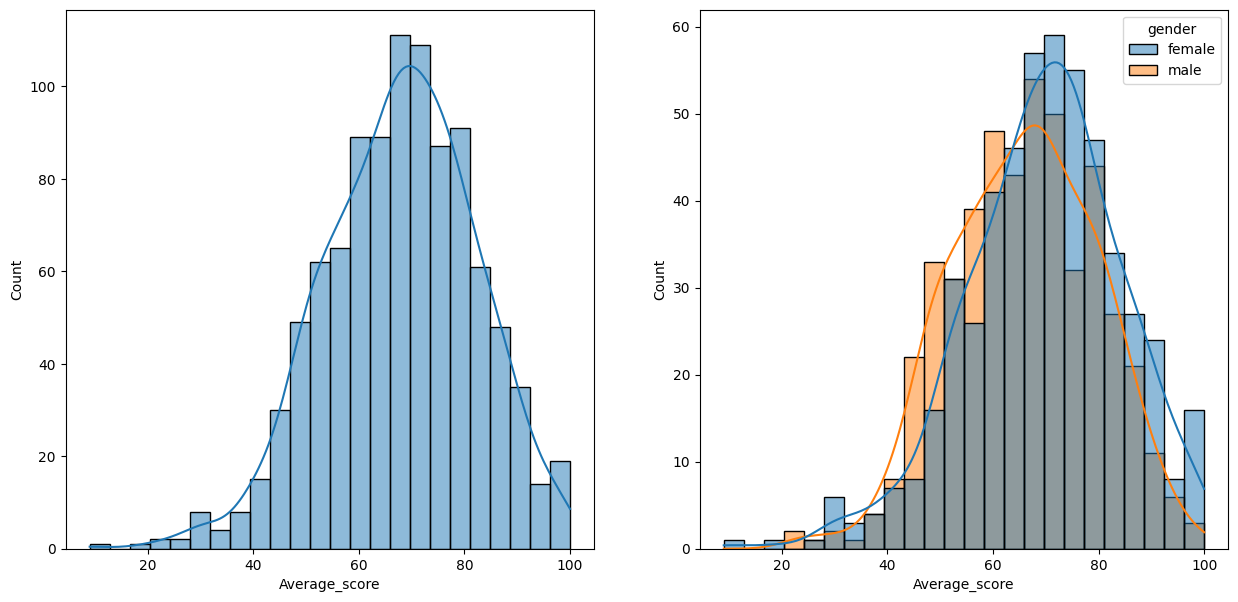

In [22]:
##Histogram and KDE
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x ='Average_score', kde = True)
plt.subplot(122)
sns.histplot(data = df, x ='Average_score', kde = True, hue ='gender')
plt.show()


### looking at the plot females have performed better in all the three subjects

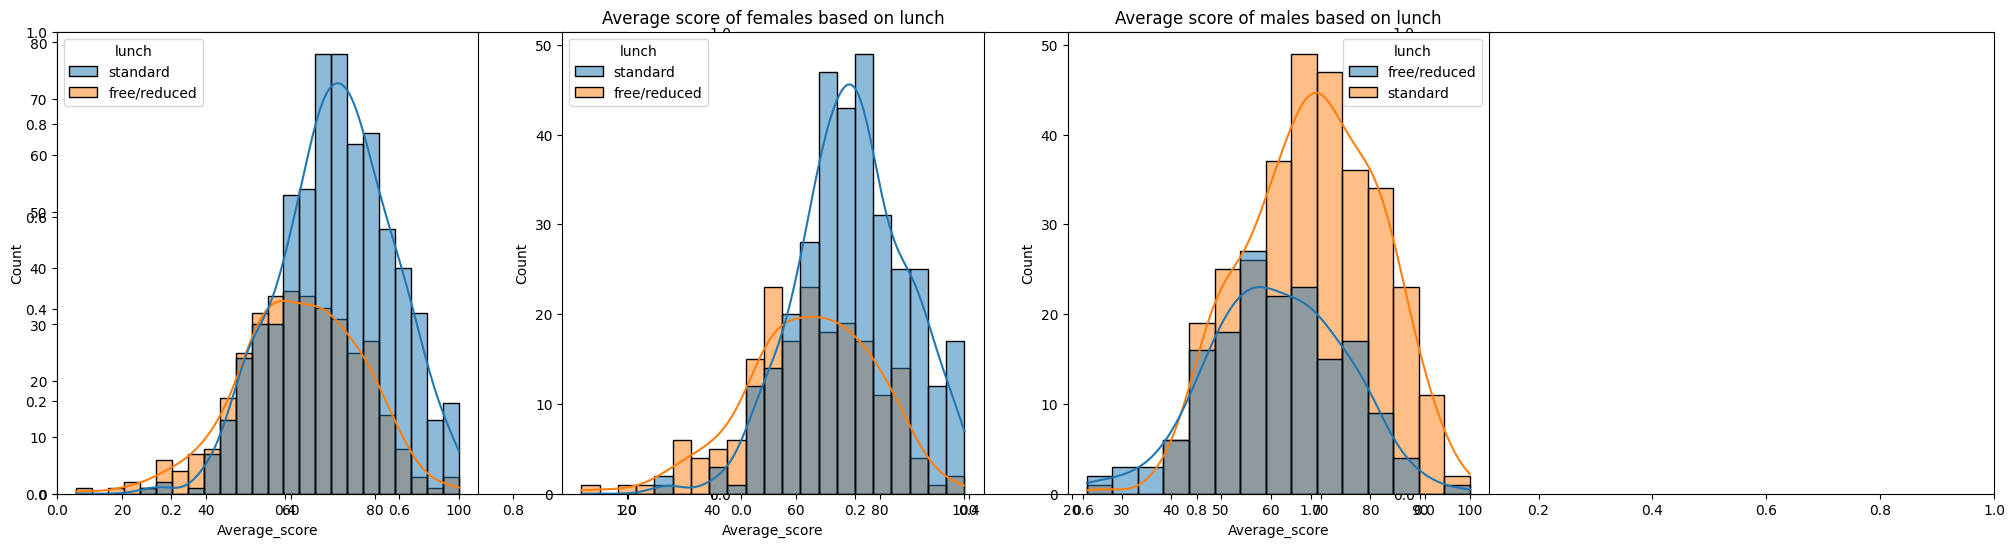

In [25]:
## Average score based on the lunch 

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average_score', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x = 'Average_score', kde =True, hue='lunch').set_title('Average score of females based on lunch')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'Average_score', kde =True, hue='lunch').set_title('Average score of males based on lunch')
plt.show()



## Students with standard meals are scoring good marks

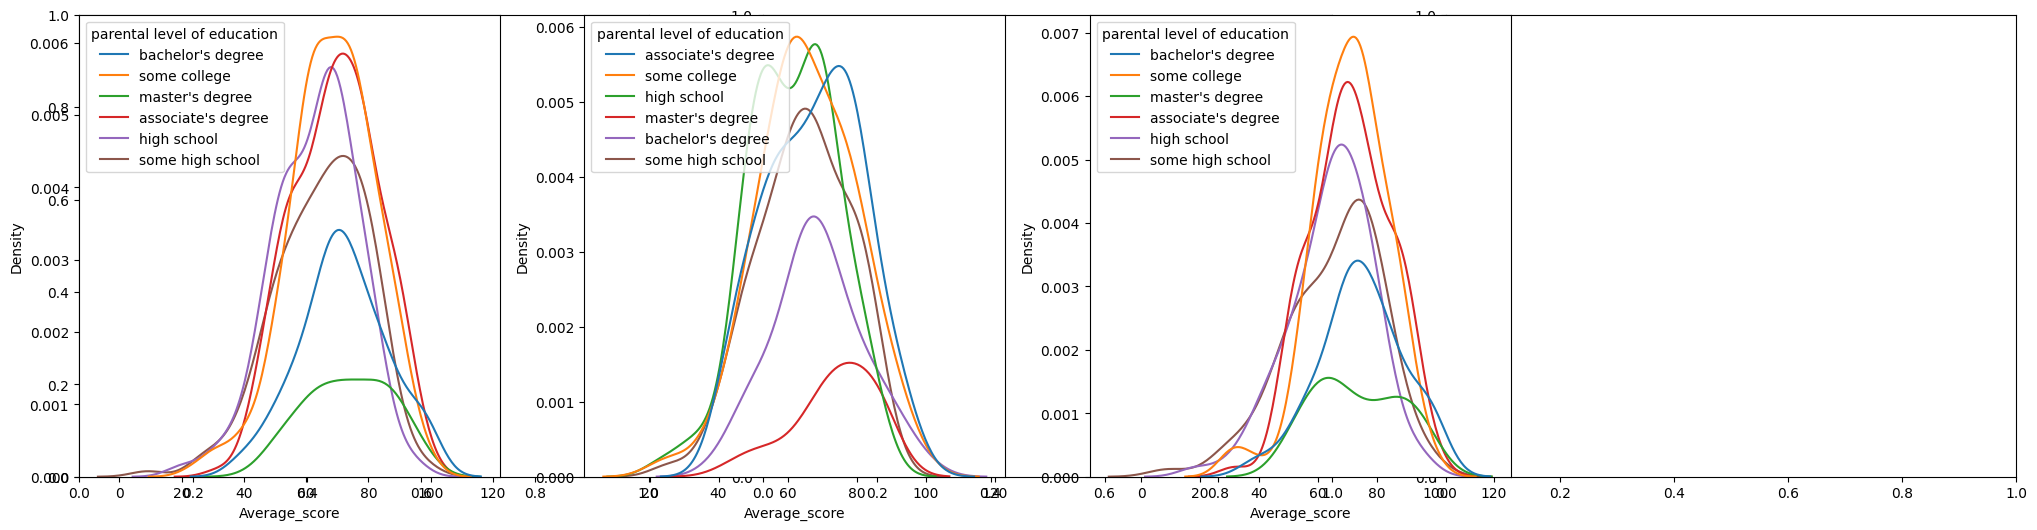

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=df,x='Average_score',hue='parental level of education')
plt.subplot(142)
ax =sns.kdeplot(data=df[df.gender=='male'],x='Average_score',hue='parental level of education')
plt.subplot(143)
ax =sns.kdeplot(data=df[df.gender=='female'],x='Average_score',hue='parental level of education')
plt.show()

There are key insigths the can found that tells us about the average score of the students with respect to parents level of education.
* Male students and female students I see that the parents with masters degree the students are not performing well. infact parents education from some collage or associate degree their children are performing well both in males and females

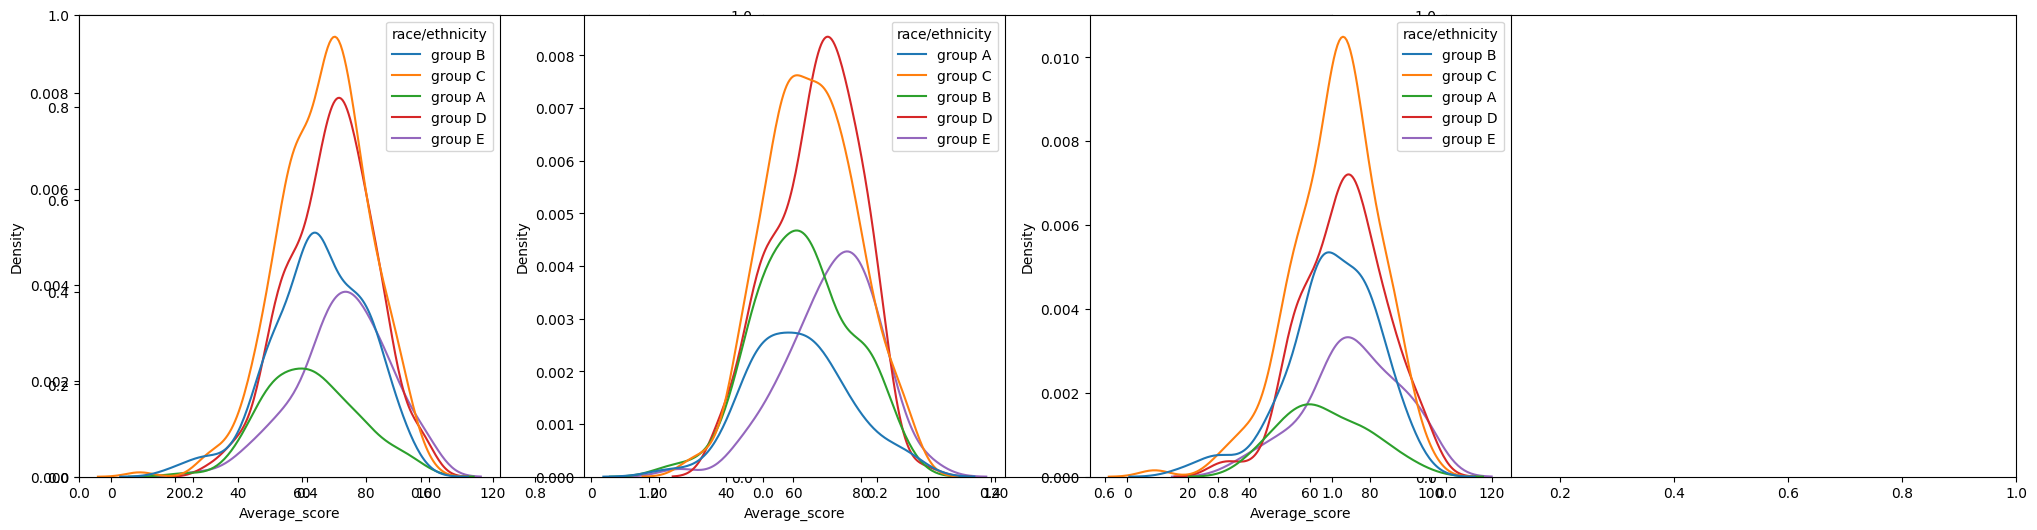

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=df,x='Average_score',hue='race/ethnicity')
plt.subplot(142)
ax =sns.kdeplot(data=df[df.gender=='male'],x='Average_score',hue='race/ethnicity')
plt.subplot(143)
ax =sns.kdeplot(data=df[df.gender=='female'],x='Average_score',hue='race/ethnicity')
plt.show()

* students from group C and  group D race / ethicity have performed well compared to other groups
*  Female students with group B has performed average but male students from the same group has not performed good
* Group E and Group A the students has performed the least both male and females

Comparing of score of students in all subjects

<Axes: title={'center': 'Average scores'}, ylabel='Average_score'>

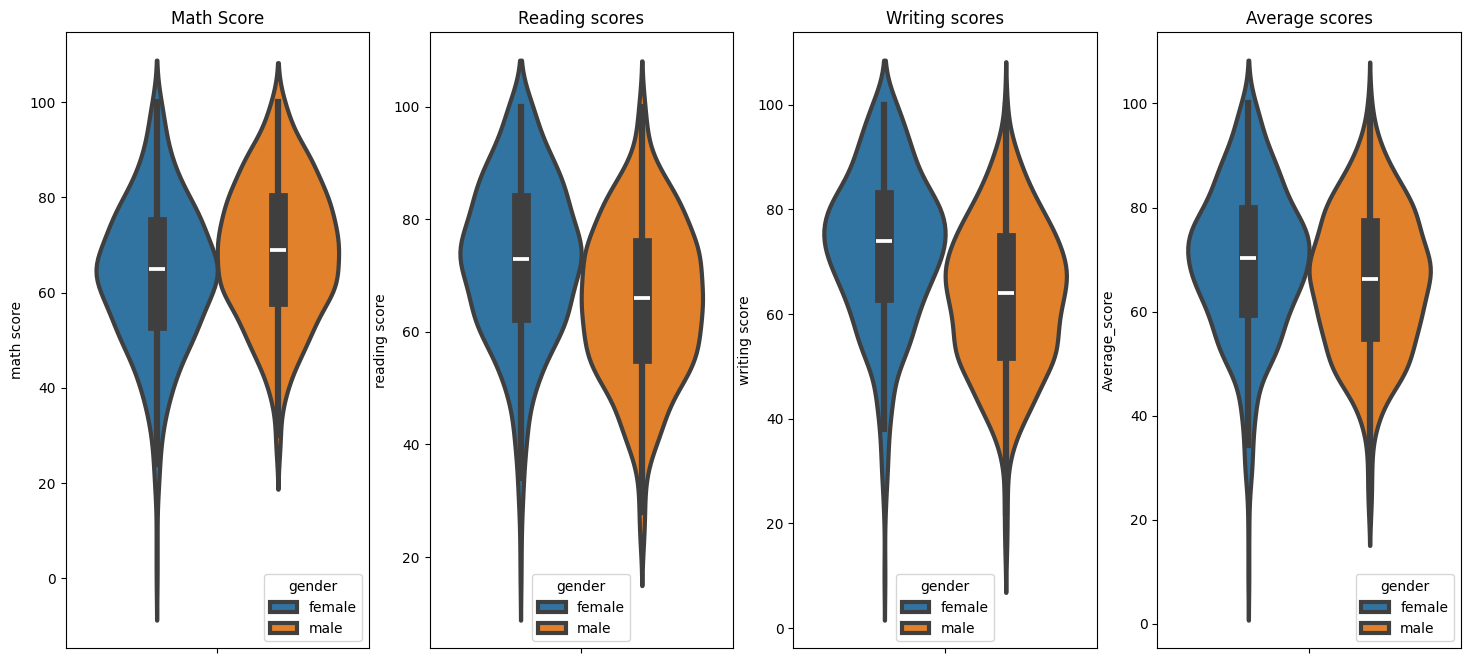

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score', data = df, hue = 'gender',  linewidth = 3)
plt.subplot(1,4,2)
plt.title('Reading scores')
sns.violinplot(y = 'reading score', data = df,hue = 'gender',  linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(y = 'writing score', data = df,hue = 'gender', linewidth = 3)
plt.subplot(1,4,4)
plt.title('Average scores')
sns.violinplot(y = 'Average_score', data = df,hue = 'gender', linewidth = 3)

* the average male students have performed well in maths compared to female students 
* But the average female students have performed well in both reading and writing when compared to male students but there are more low scorers females when compared to male
* the overall average score among all the three subjects are above 60% but on an average females have performed well compared to male

### 4.3 Multivariate analysis using pieplot

In [29]:
def create_pie_plot(data, features):
    count = 1
    #palette_color = sns.color_palette('dark')
    plt.figure(figsize=(37,10))
    for col_names in features:
        plt.subplot(1,5,count)
        plt.pie(data[col_names].value_counts(), labels = data[col_names].value_counts().index,autopct = '%.0f%%')
        plt.title(col_names, fontsize = 20)
        plt.axis('off')
        count += 1

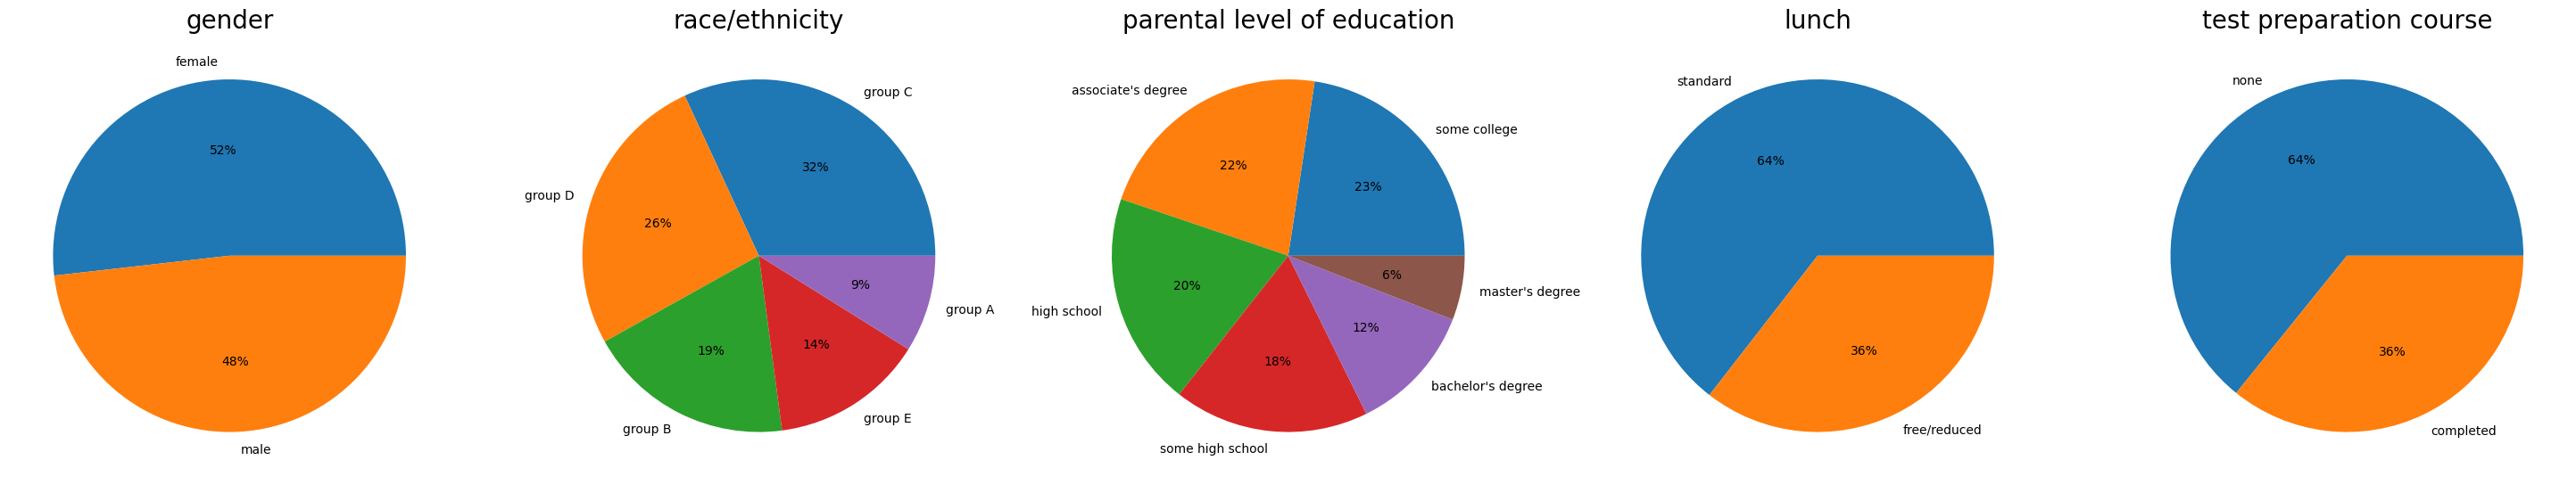

In [30]:
create_pie_plot(df, cat_features)

* As seen earlier there are more female students
* More % of students belongs to group D and group C and less students belongs to group A
* total of 65% students belong to parents who has gone to some college, got a bachelor's degree , masters degree
* there are only 6% and 12% of students whos parents have a masters degree or a bachlor's degree
* interesting fact is 20% of students belongs to parents whos education level is only uptill highschool
* 64% of students have not enrolled in any test preparation score are more

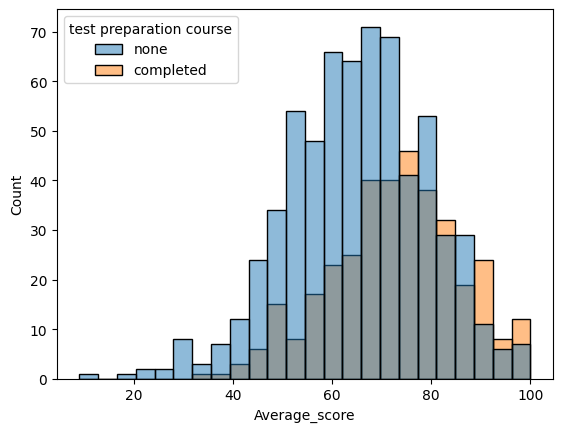

In [31]:
ax =sns.histplot(data=df,x='Average_score',hue='test preparation course')

* Here we can see that students who didnt enrolled for the test preparation score scored less compared to other students who completed the score

### 4.4 Feature wise visualization
#### 4.4.1 Gender column

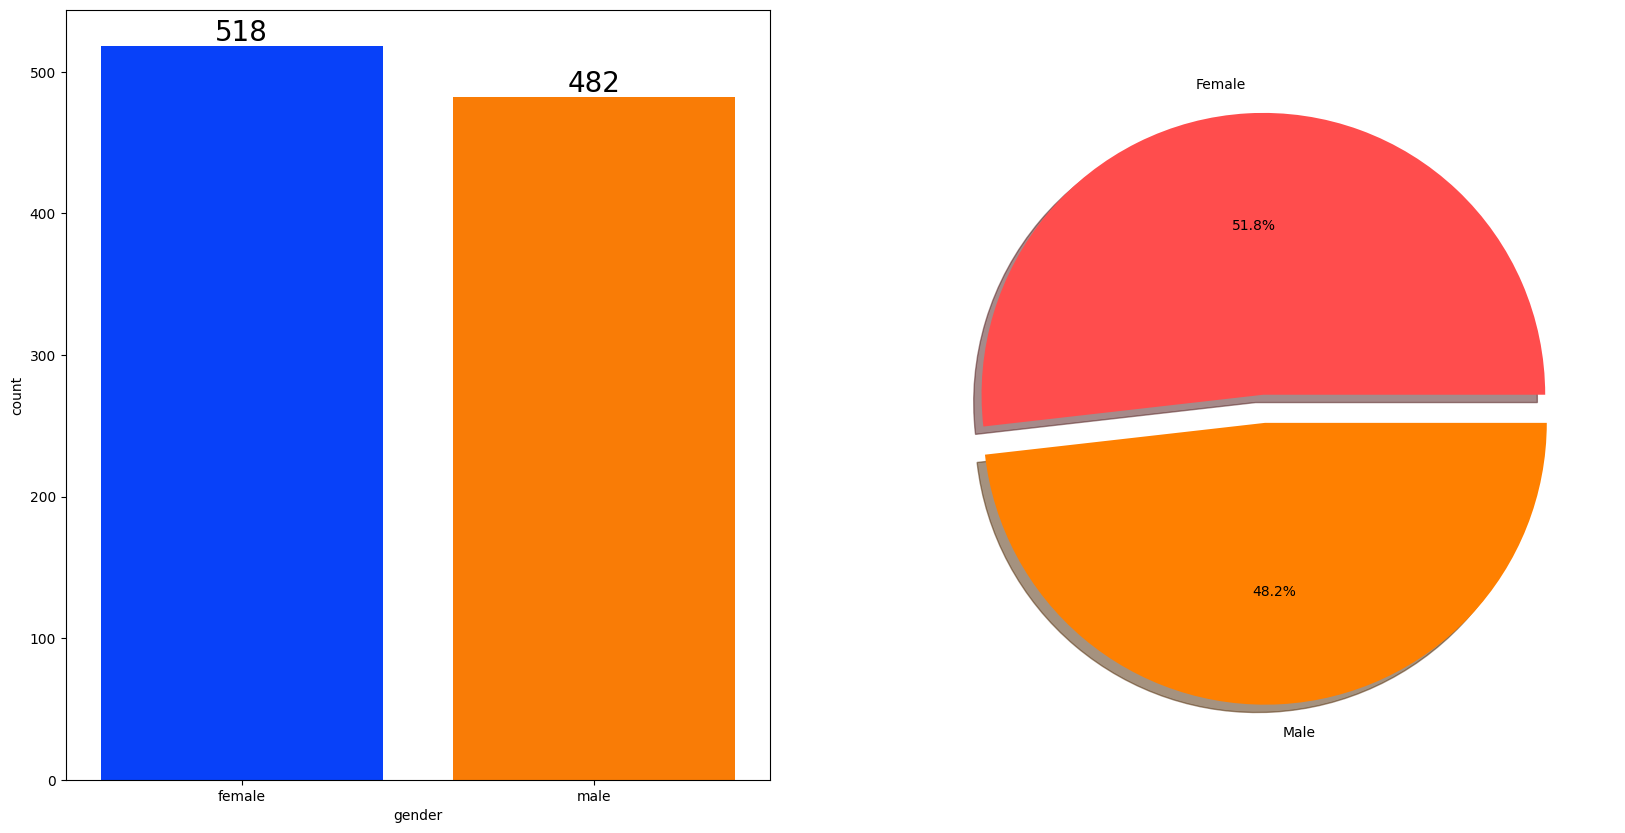

In [32]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = df['gender'], data = df, palette ='bright' , ax= ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
plt.pie(x=df['gender'].value_counts(),labels=['Female', 'Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Bivariate Analysis (does gender has any impact on student's performance)

In [34]:
gender_group = df.groupby('gender').count()


,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


In [35]:
plt.figure(figsize =(10,8))
X = ['Total Average','Math Average']

<Figure size 1000x800 with 0 Axes>

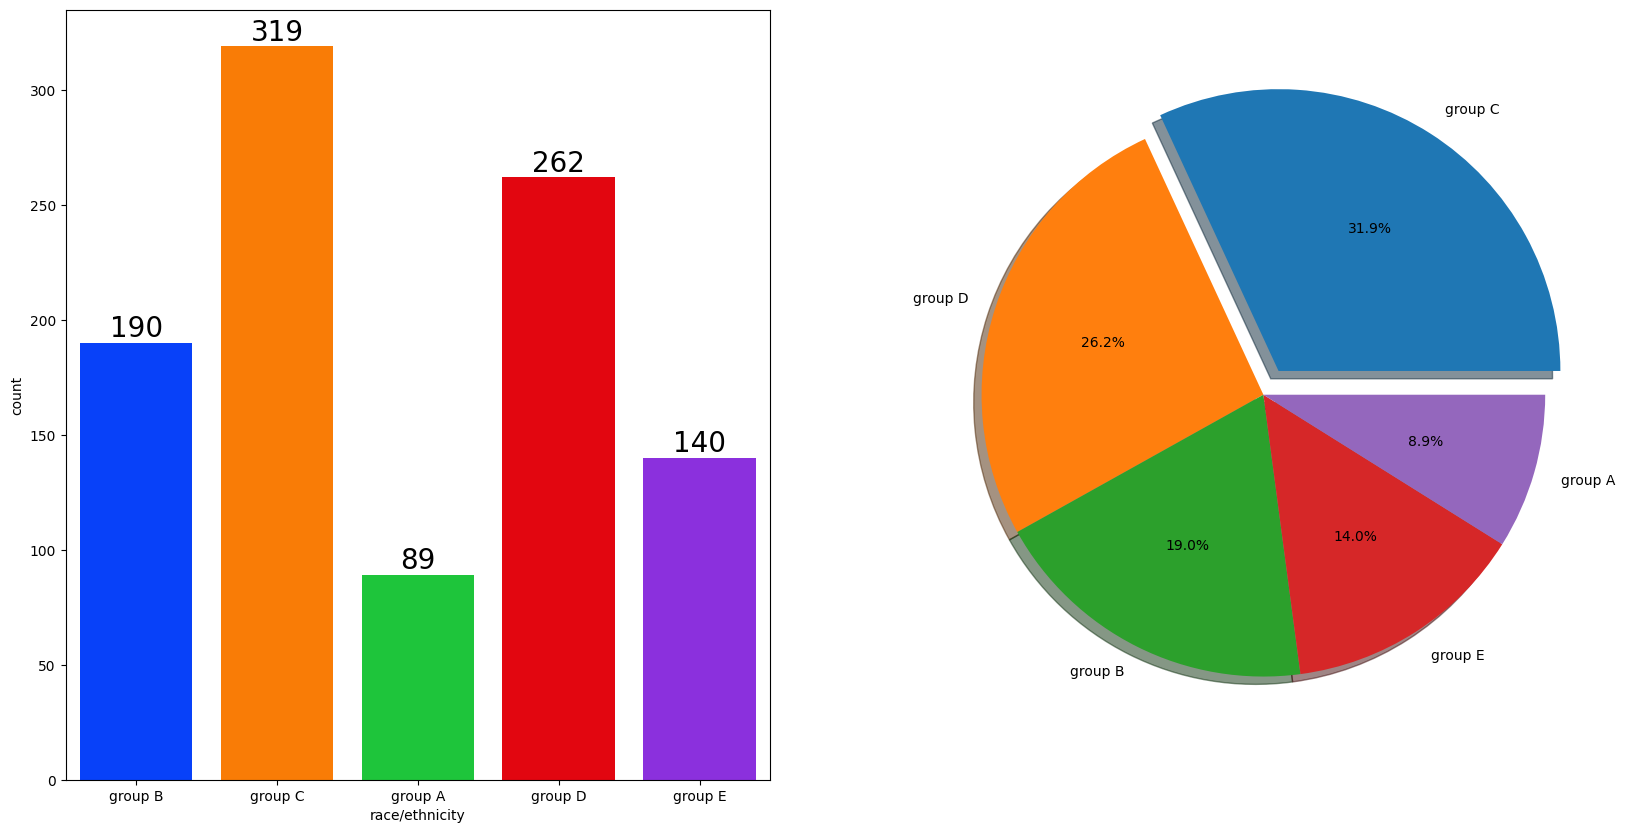

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### Bivariate Analysis (does race/Ethinicity have any impact on students performance?)

In [41]:
group_by_race_ethinicity = df.groupby('race/ethnicity')

In [42]:
group_by_race_ethinicity['math score'].mean().index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')

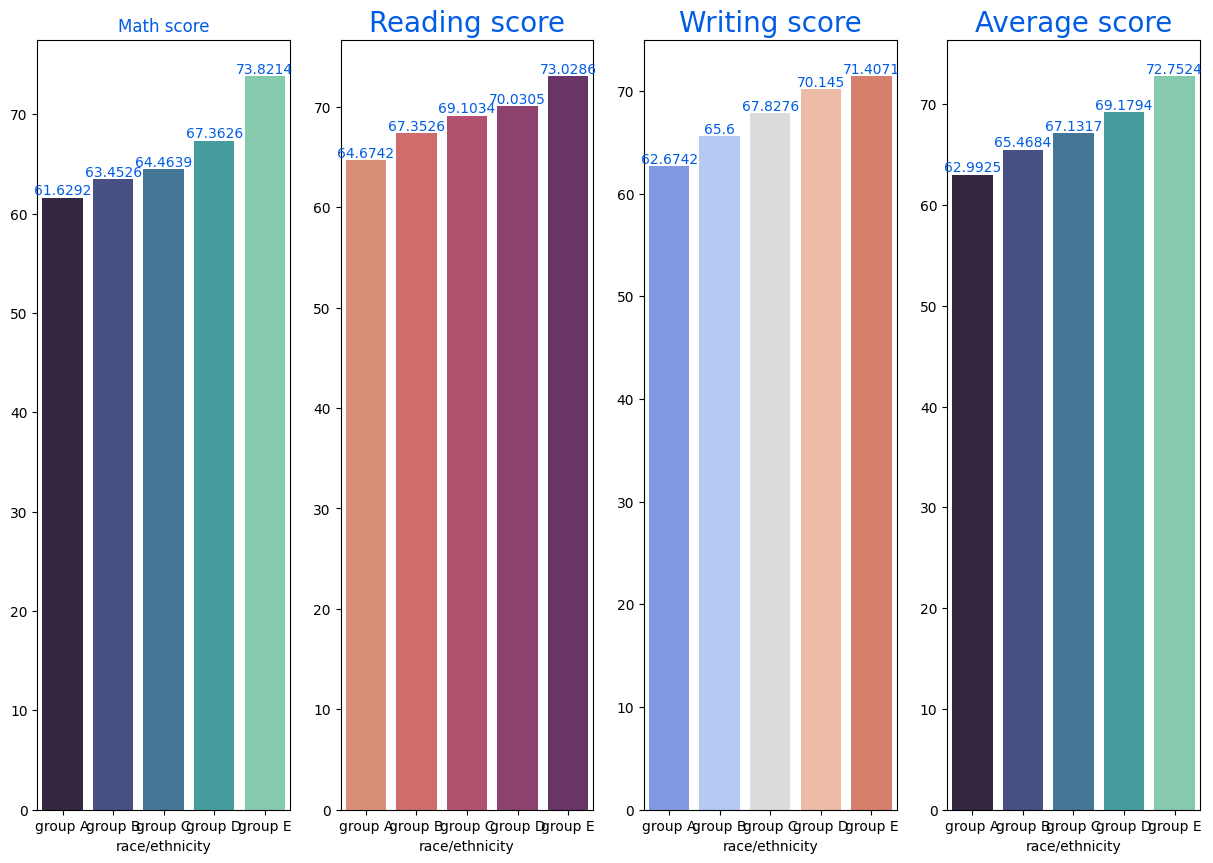

In [43]:
f, ax = plt.subplots(1,4, figsize =(15,10))
sns.barplot(x= group_by_race_ethinicity['math score'].mean().index, y = group_by_race_ethinicity['math score'].mean().values, palette ='mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6')

for container in ax[0].containers:
    ax[0].bar_label(container, color = '#005ce6', size = 10)

sns.barplot(x= group_by_race_ethinicity['reading score'].mean().index, y = group_by_race_ethinicity['reading score'].mean().values, palette='flare', ax =ax[1])
ax[1].set_title('Reading score', color = '#005ce6', size = 20)
for container in ax[1].containers:
    ax[1].bar_label(container, color = '#005ce6', size = 10)
    
sns.barplot(x= group_by_race_ethinicity['writing score'].mean().index, y = group_by_race_ethinicity['writing score'].mean().values, palette='coolwarm', ax =ax[2])
ax[2].set_title('Writing score', color = '#005ce6', size = 20)
for container in ax[2].containers:
    ax[2].bar_label(container, color = '#005ce6', size = 10)
    
sns.barplot(x= group_by_race_ethinicity['Average_score'].mean().index, y = group_by_race_ethinicity['Average_score'].mean().values, palette='mako', ax =ax[3])
ax[3].set_title('Average score', color = '#005ce6', size = 20)
for container in ax[3].containers:
    ax[3].bar_label(container, color = '#005ce6', size = 10)

* children belonging to group E has scored the highest marks and students belonging to group A has scored the lowest
* we saw that there were less number of students belonging to group A and these students have performed the lowest

### Bivariate Analysis (Does parental education) have an impact on students performance

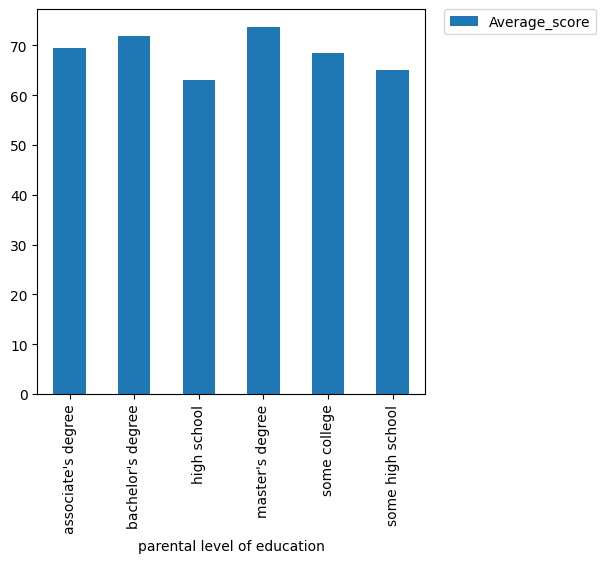

In [45]:
groupby_score_parental_level_of_education =df.groupby('parental level of education')
groupby_score_parental_level_of_education['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* students who's parents have a mastes degree and bachelor degree, their performance are good
* students with lowest performance have parents with high school degree

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? 

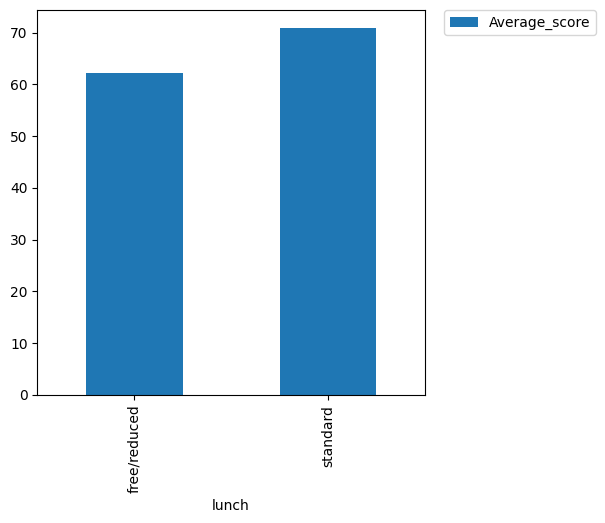

In [46]:
group_by_lunch_average_score = df.groupby('lunch')
group_by_lunch_average_score['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

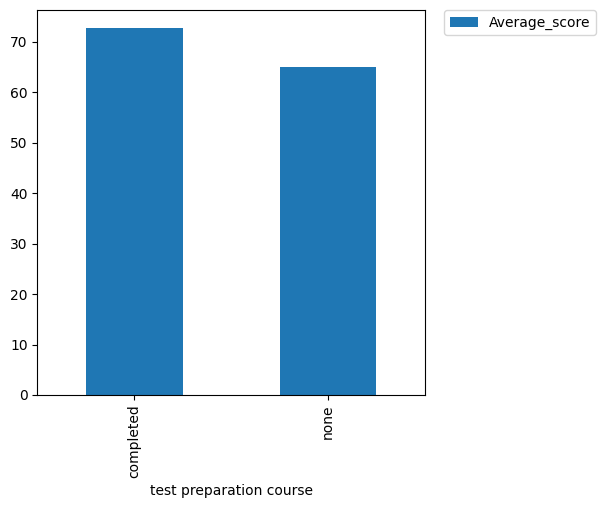

In [48]:
group_by_test_preparation_course = df.groupby('test preparation course')
group_by_test_preparation_course['Average_score'].agg('mean').plot(kind = 'bar', figsize = (5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

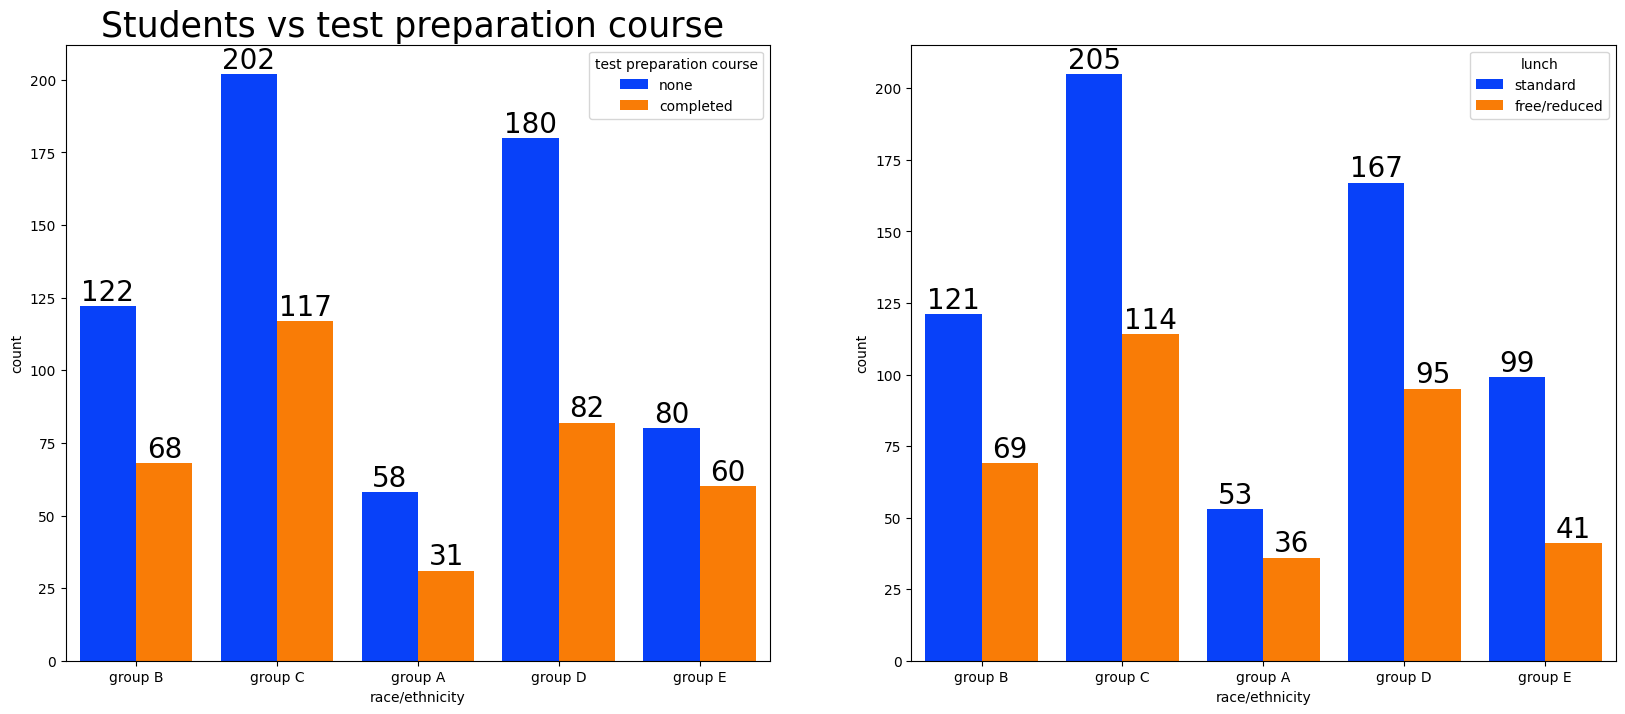

In [49]:
group_by_race_ethinicity
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

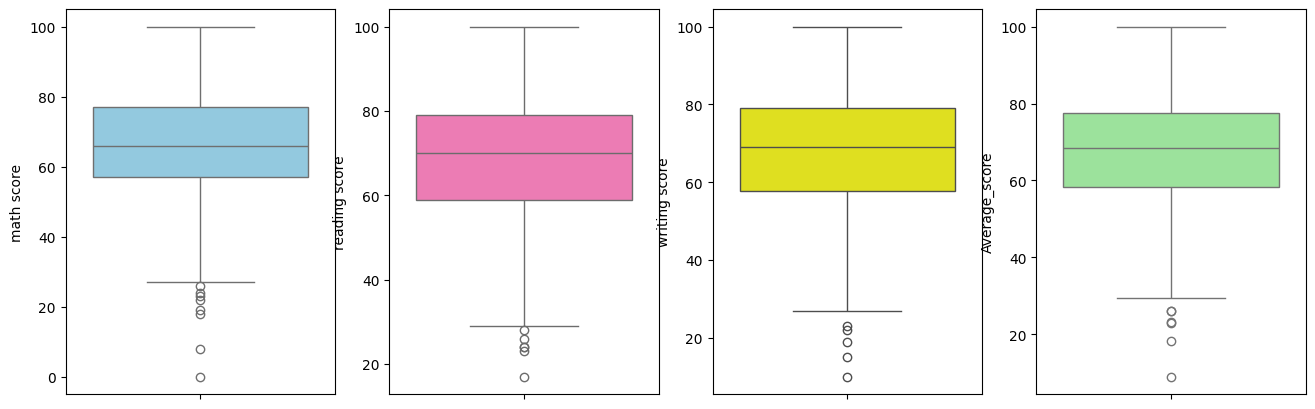

In [51]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

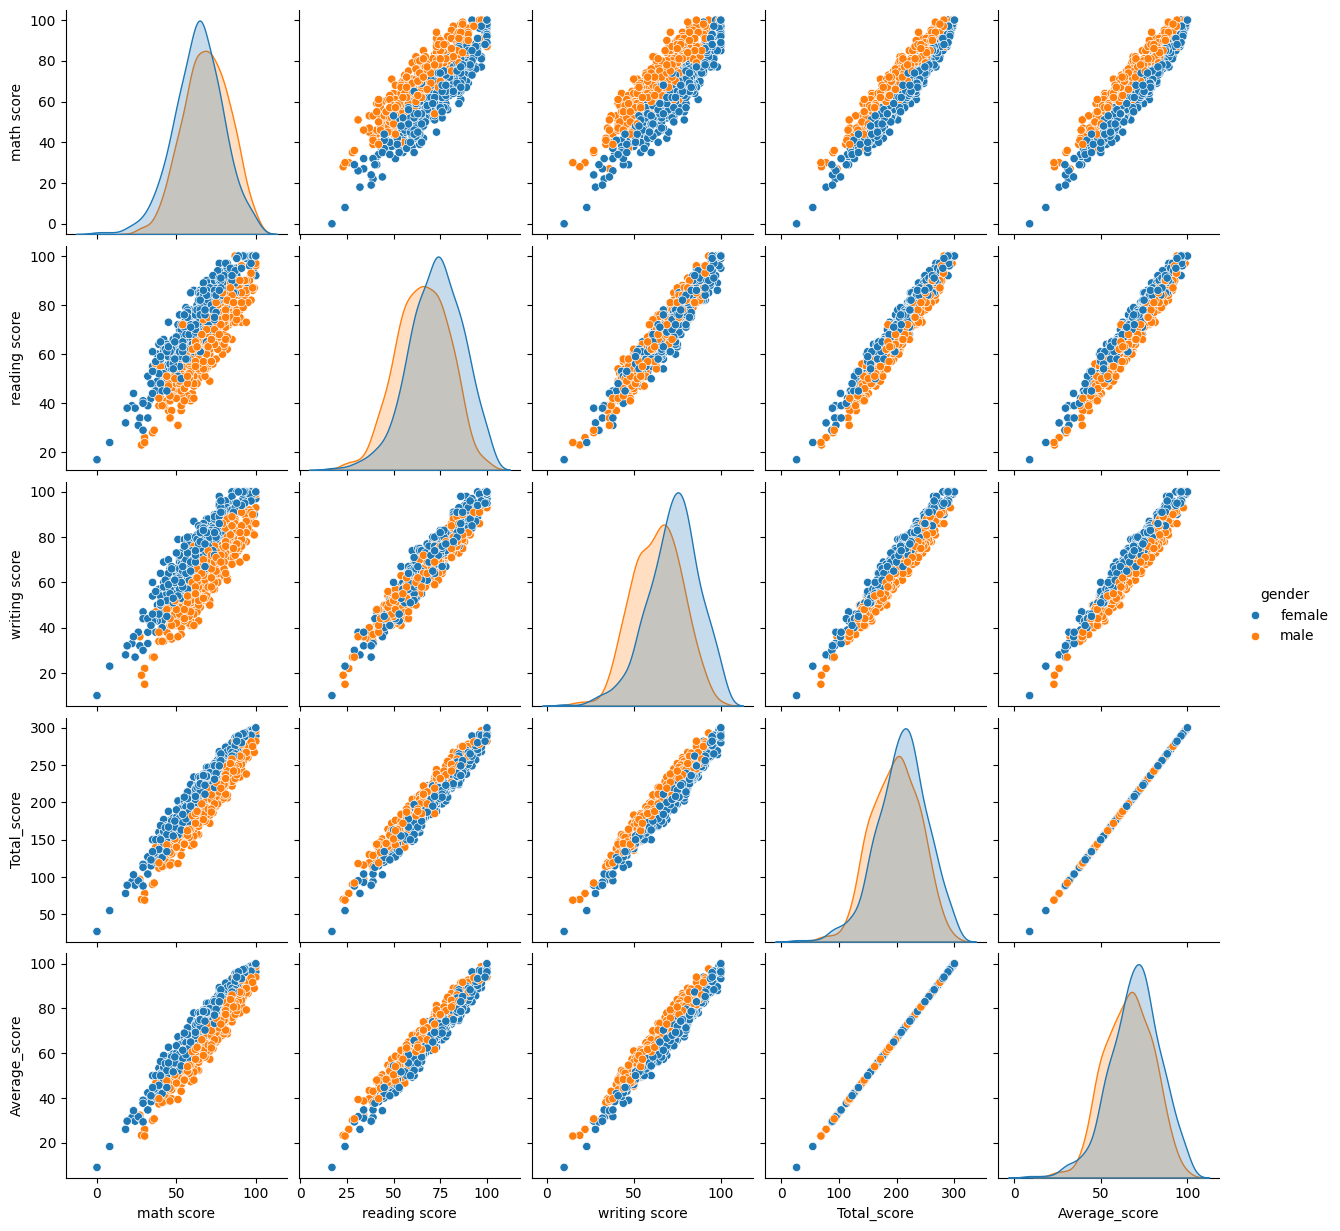

In [53]:
sns.pairplot(df,hue='gender')
plt.show()